<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_mar_2020/blob/master/02_Mahotas_fracionado_A_mar_03_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install mahotas

In [0]:
# fotos pequenas 
# 02_Mahotas_fracionado_B_mar_03_2020.ipynb 
# fotos grandes
# 02_Mahotas_fracionado_A_mar_03_2020.ipynb

In [0]:
Escolha=['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 
         'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 
         'IMC1', 'IMC2']
Prop=Escolha[1] # Propriedade a escolher para ter picos, largura de pico, proeminencia,...

In [0]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_fev_2020


In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
from scipy import stats
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
from scipy import integrate
import re
import Go2BlackWhite
import Go2Mahotas
%matplotlib inline

In [0]:

Size=20 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
Transfere='Fotos_Grandes.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:
!ls

00_Arquivos_utilizados_nesta_pasta.ipynb
01_Features_Mahotas_Completo_fev_11_2020.ipynb
02_Mahotas_fracionado_B_mar_03_2020.ipynb
02_Mahotas_fracionado_fev_14_2020.ipynb
02_Mahotas_fracionado_fev_18_2020.ipynb
02_Mahotas_fracionado_fev_20_2020.ipynb
Color_Features_Determination_fev_06_2020.ipynb
Features_Determination_fev_06_2020.ipynb
Features_fev_2020.zip
Features_Mahotas_fev_11_2020.ipynb
Fotos9Amostras.zip
Fotos_Grandes
Fotos_Grandes.zip
Go2BlackWhite.py
Go2GLCM.py
Go2Mahotas.py
Matriz_rede_fev_06_2020.ipynb
README.md


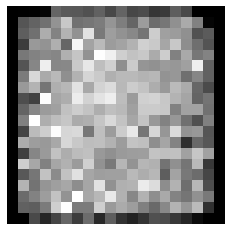

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[5], cmap = "gray")

In [0]:
NumFotos=len(img_name)

In [0]:
# Find the list elements starting with specific letter
subs = 'B'
Buraco = [x for x in img_name if re.search(subs, x)] 
subs = 'G'
Grao = [x for x in img_name if re.search(subs, x)] 
subs = 'I'
Indef = [x for x in img_name if re.search(subs, x)] 

In [0]:
# ESTA PARTE PRECISA PARA CALCULAR OS PICOS E AREA ABAIXO DA CURVA, CADA
# LINHA E UMA CURVA DA PROPRIEDADE ESCOLHIDA PARA UMA FOTO E CADA COLUNA 
# UM QUADRADO DA FOTO ANDANDO...
Todas_Fotos=[] 
# Todas_Fotos tem os valores medio da propriedade cada linha representa 
# uma foto e cada coluna as subdivisoes da foto (um quadrado que anda ao 
# longo da foto)
for k in range(NumFotos):
  Prop_Escolhida=[]
  #p_foto=ww[k,:].reshape(Size,Size)
  p_foto=ww[k].reshape(Size,Size)
  GLCM=[]
  glcm_haralick=[]
  x_ref=[]
  Count=Sub_Size
  p=np.zeros((Sub_Size,Sub_Size))
  j_ref=0
  Cada_foto=[]
  Posicao_X=[]
  Posicao_Y=[]
  for k in range(Size):
    if((k+Sub_Size-1)<Size):
      #print("(k+Sub_Size)=",(k+Sub_Size),"k=",k)
      for i in range(Sub_Size):
        Posicao_X.append(Crop+i)
        for j in range(Sub_Size):
          p[i,j]=p_foto[Crop+i,j+k]
          Posicao_Y.append(j+k)

      WW=np.copy(p) 
      Cada_foto.append(WW.ravel())
      x_ref.append(Count-Sub_Size)
      Count=Count+1
     
      Mahotas =pd.DataFrame(mahotas.features.haralick(p.astype(int)), columns =Escolha)
      Prop_Escolhida.append(Mahotas[Prop].mean())

  Todas_Fotos.append(Prop_Escolhida)

df=pd.DataFrame(Todas_Fotos)



In [0]:
print(df)

             0            1   ...           15           16
0   2195.472222  1432.756944  ...  1274.715278  2683.701389
1   3998.159722  1236.548611  ...  2147.104167  3830.381944
2   1254.583333  1952.944444  ...  2133.152778  3028.243056
3   3767.687500  3322.159722  ...  4598.993056  4023.645833
4   6611.208333  2386.756944  ...  3115.986111  4837.513889
5   6944.534722  4261.979167  ...  5417.375000  6221.319444
6   4362.861111  2212.500000  ...  2618.715278  2911.138889
7   1886.652778  1686.833333  ...  3331.805556  3103.750000
8   5110.236111  5357.486111  ...  1627.951389  1671.833333
9   3894.604167  3095.361111  ...  3062.131944  6895.215278
10  7614.159722  4495.236111  ...  4218.805556  6627.868056
11  1905.819444  1617.541667  ...  3549.291667  4354.166667
12  2423.819444   818.868056  ...  5525.284722  9124.263889
13  2069.152778  2524.520833  ...  1460.236111  2050.013889
14  2668.965278  3072.520833  ...  5219.819444  4433.909722
15  3666.763889  1651.423611  ...  3299.

In [0]:
print(len(Cada_foto[0])) # Cada_foto contem a foto pequena varrida
print(np.array(Cada_foto).shape)

16
(17, 16)


In [0]:
print(NumFotos)

18


In [0]:
# esta parte calcula picos, area abaixo da curva antes ela precisa gerar 
# o dataframe que contem a propriedade escolhida com uma foto em cada linha ....
Features_Total=[]
for i in range(NumFotos):
  x=df.iloc[i]
  peaks, rr = find_peaks(x, height=0)

  N_peaks=len(peaks)
  prominences = peak_prominences(x, peaks)
  
  #Area = simps(x, dx=1)
  Area = integrate.simps(x, dx=1)
  if(len(peaks)==0):
    Width_peaks =0
    Width_peaks_max =0
    Width_peaks_min =0
    Media_proem=0    
  else:
    Width_peaks =np.mean(peak_widths(x, peaks, rel_height=0.5))
    Width_peaks_max =np.max(peak_widths(x, peaks, rel_height=0.5))
    Width_peaks_min =np.min(peak_widths(x, peaks, rel_height=0.5))
    Media_proem=np.mean(prominences)
  Median = np.median(x)
  Mode= stats.mode(x)[0]
  Mean=np.mean(x)
  Sd=np.std(x)

  Features=[]
  Features.append(N_peaks)
  Features.append(Media_proem )
  Features.append(Area)
  Features.append(Width_peaks )
  Features.append(Width_peaks_max)
  Features.append(Width_peaks_min)
  Features.append(Median )
  Features.append(Mode[0])
  Features.append(Mean)
  Features.append(Sd)

  Features_Total.append(Features)

Nomes_Fracionada=['N_peaks','Media_proem','Area','Width_peaks','Width_peaks_max',
                    'Width_peaks_min','Median','Mode','Mean','Sd'] 
  
Features_Total=pd.DataFrame(Features_Total,columns=Nomes_Fracionada)


In [0]:
print(Features_Total)

    N_peaks  Media_proem          Area  ...         Mode         Mean           Sd
0         2   572.853009  31446.090278  ...   941.875000  2006.143791   975.100472
1         1   449.388889  35530.537037  ...  1106.750000  2360.277369   849.548436
2         2   518.478009  29952.266204  ...   435.895833  1867.739379   875.846336
3         3   334.019290  41249.861111  ...  1100.048611  2634.691585  1071.684170
4         2   155.675926  30912.490741  ...   509.902778  2191.235294  1453.385240
5         1    57.456019  43821.969907  ...  1076.590278  2965.673203  1883.417829
6         1   714.173611  31620.444444  ...   798.048611  2083.889297   875.158176
7         2    61.763889  22437.388889  ...   529.409722  1461.268382   891.571690
8         2   728.251157  50873.087963  ...  1430.513889  3185.747958  1516.228582
9         1    37.113426  32565.675926  ...  1025.020833  2269.249592  1388.444326
10        3   291.766975  50380.930556  ...  1401.000000  3416.674020  1629.980528
11  

In [0]:
# found drive
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [0]:
print(Features_Total.iloc[5])


N_peaks                1.000000
Media_proem           57.456019
Area               43821.969907
Width_peaks          382.353857
Width_peaks_max     1516.982639
Width_peaks_min        0.716394
Median              2105.875000
Mode                1076.590278
Mean                2965.673203
Sd                  1883.417829
Name: 5, dtype: float64


In [0]:

print(Features_Total.iloc[9])

N_peaks                1.000000
Media_proem           37.113426
Area               32565.675926
Width_peaks          489.278475
Width_peaks_max     1948.663194
Width_peaks_min        0.725354
Median              1898.993056
Mode                1025.020833
Mean                2269.249592
Sd                  1388.444326
Name: 9, dtype: float64


In [0]:
# get csv file
#Features_Total.to_csv('Contraste_Fracionado_fev_2020.csv')
# a mundaca do formato  float_format="%.5f"   objetiva 
# evitar corromper alguns pontos como aconteceu 
# antes desta mudanca mudar 
Features_Total.to_csv('Contraste_Fracionado_fev_2020.csv', float_format="%.5f")

In [0]:
# save in drive
!cp Contraste_Fracionado_fev_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/